In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

### Definition of the model

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, gamma,beta1,beta2,t_tresh=22):
    S,I,R = y

    if t<=t_tresh:
        B=beta1
    elif t>t_tresh and t<=1000:
        B=beta1*np.exp(-(t-t_tresh)/beta2)
    elif t>1000:
        B=0.2*np.exp(-(t-1000)/beta2)
    
    dSdt = -(B*I/N)*S 
    dIdt = (B*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    #erre0=B*S/N/gamma
    #print(erre0)
    
    return dSdt, dIdt, dRdt

### Integration of the differential equations

In [3]:
def time_evo(N,beta1,beta2,gamma,death_rate,t_tresh=22,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,gamma,beta1,beta2,t_tresh))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,(1-death_rate/100)*R,R*death_rate/100)

### Show the result

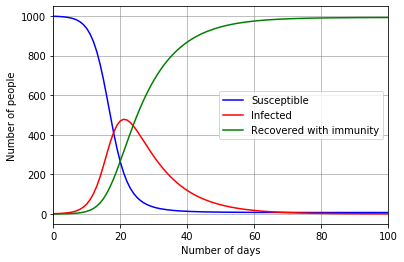

In [4]:
fin_result=time_evo(1000,0.5,10000,0.1,0)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered with immunity')
#plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend(loc=5)
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,100)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.savefig('plotsir05.png',dpi=300)
plt.show()

#print(s_vec+i_vec+r_vec+m_vec)

### Load italian data

In [5]:
data = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
xdata=pd.to_numeric(range(data.shape[0]))
ydata=data['totale_casi']
ydata_death=data['deceduti']
ydata_rec=data['dimessi_guariti']

data.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,221,1,7,229,4324,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,1,10,322,8623,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,3,12,400,9587,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,45,17,650,12014,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,46,21,888,15695,NaN,NaN


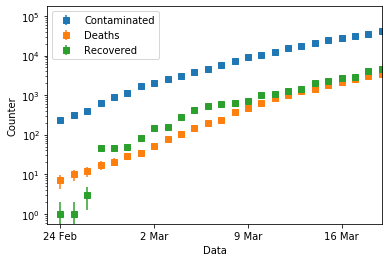

In [6]:
plt.errorbar(xdata,ydata,np.sqrt(ydata),linestyle='None',label='Contaminated',marker='s')
plt.errorbar(xdata,ydata_death,np.sqrt(ydata_death),linestyle='None',label='Deaths',marker='s')
plt.errorbar(xdata,ydata_rec,np.sqrt(ydata_rec),linestyle='None',label='Recovered',marker='s')
plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Counter')
plt.xticks(np.arange(0,50,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar'])
plt.xlim(-1,24)
plt.legend()
plt.savefig('Data only.png',dpi=300)
plt.show()

In [7]:
data.iloc[-1]

data                           2020-03-29T17:00:00
stato                                          ITA
ricoverati_con_sintomi                       27386
terapia_intensiva                             3906
totale_ospedalizzati                         31292
isolamento_domiciliare                       42588
totale_attualmente_positivi                  73880
nuovi_attualmente_positivi                    3815
dimessi_guariti                              13030
deceduti                                     10779
totale_casi                                  97689
tamponi                                     454030
note_it                                 pd-IT-0009
note_en                                 pd-EN-0009
Name: 34, dtype: object

In [8]:
(6077)/(6077+7432)

0.4498482493152713

### comparison between model and data

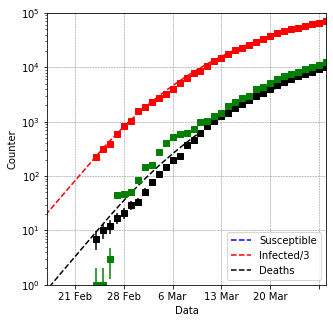

In [9]:
fin_result=time_evo(60*10**6,0.415,28.3,1/14,6.5,t_tresh=17,I0=2,t=np.arange(0,720))
#fin_result=time_evo(60*10**6,0.41,28,0.0666666,4.88888,t_tresh=17,I0=2,t=np.arange(0,720))

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

ydata_inf=ydata-ydata_rec-ydata_death

plt.figure(figsize=(5,5))
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(10,50)
plt.ylim(1,10**5)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('sirdatacomp_v3.png',dpi=300)
plt.show()

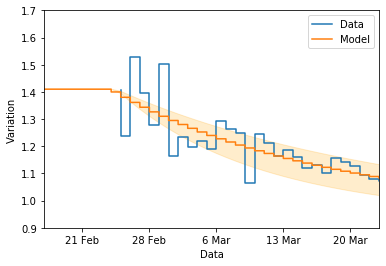

In [10]:
# percentage variation of the contaminted people, compared to the previous day


# data increment
incremento=[]

for i in range(1,len(ydata)):
    incremento.append(ydata_inf[i]/ydata_inf[i-1])
 

# sir increment
incr_SIR=[]

for i in range(len(i_vec)-1):
    incr_SIR.append(i_vec[i+1]/i_vec[i])


#general increment (function)

def incr_SIR_fun(N,beta0,beta1,gamma,death_rate,t_tresh=17,I0=2,t=np.arange(0,720)):
    fin_result=time_evo(N,beta0,beta1,gamma,death_rate,t_tresh=17,I0=2,t=np.arange(0,720))
    t=fin_result[0]
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]
    
    incr_SIR=[]
    
    for i in range(len(i_vec)-1):
        incr_SIR.append(i_vec[i+1]/i_vec[i])
        
    return np.array(incr_SIR)

# upper and lower limits

beta1h=37
beta1l=18

incr_SIR_high=incr_SIR_fun(60*10**6,0.415,beta1h,1/14,6)
incr_SIR_low=incr_SIR_fun(60*10**6,0.415,beta1l,1/14,6)

    
plt.step(xdata[xdata>=1]+17,incremento,label='Data')
plt.step(t[1:],incr_SIR,label='Model')
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,43,1/14,5))
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,13,1/14,5))
plt.fill_between(t[1:],incr_SIR_high,incr_SIR_low,color='orange',alpha=0.2)
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(10,45)
plt.ylim(0.9,1.7)
plt.legend()
plt.savefig('first_derivative_SIR_band_v3.png',dpi=300)
plt.show()

In [11]:
# upper curve

fin_result_high=time_evo(60*10**6,0.415,beta1h,1/14,6,t_tresh=17,I0=2,t=np.arange(0,720))

t_high=fin_result_high[0]
s_vec_high=fin_result_high[1]
i_vec_high=fin_result_high[2]
r_vec_high=fin_result_high[3]
m_vec_high=fin_result_high[4]


# lower curve

fin_result_low=time_evo(60*10**6,0.415,beta1l,1/14,6,t_tresh=17,I0=2,t=np.arange(0,720))

t_low=fin_result_low[0]
s_vec_low=fin_result_low[1]
i_vec_low=fin_result_low[2]
r_vec_low=fin_result_low[3]
m_vec_low=fin_result_low[4]

## predictions (best fit)

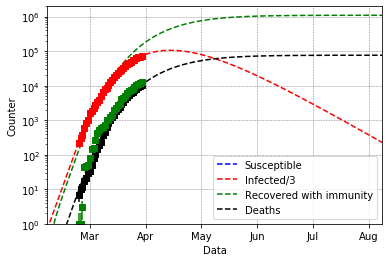

In [12]:
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlim(0,180)
plt.ylim(1,0.2*10**7)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('sirdatacomp_prediction_v3.png',dpi=300)
plt.show()

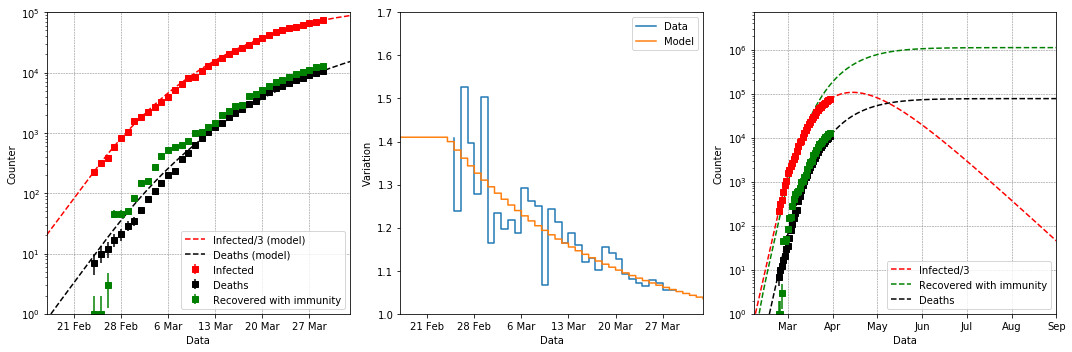

In [13]:
### combined plot

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s',label='Infected')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s',label='Deaths')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s',label='Recovered with immunity')
plt.plot(t, s_vec, 'b--')
plt.plot(t, i_vec/3, 'r--',label='Infected/3 (model)')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--',label='Deaths (model)')
plt.yscale('log')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar'])
plt.xlim(10,55)
plt.ylim(1,10**5)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.subplot(1,3,2)
plt.step(xdata[xdata>=1]+17,incremento,label='Data')
plt.step(t[1:],incr_SIR,label='Model')
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar'])
plt.xlim(10,55)
plt.ylim(1,1.7)
plt.legend()
plt.subplot(1,3,3)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
#plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xlim(0,180)
plt.ylim(1,0.7*10**7)
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('output/combined_SIR_v3.png',dpi=300)
plt.show()

In [14]:
print('Total deaths ',int(m_vec[-1]))
print('Total infected ',int(m_vec[-1]+r_vec[-1]))
print('Maximum infected ',int(i_vec.max()/3))
print('Maximum infected (hospitalized)',int(i_vec.max()/3*20/100))
print('Maximum infected (intensive care)',int(i_vec.max()/3*7/100))

Total deaths  76858
Total infected  1182440
Maximum infected  106605
Maximum infected (hospitalized) 21321
Maximum infected (intensive care) 7462


In [15]:
modello_check=i_vec[17:17+len(ydata)]/3
data_check=ydata_inf

accuracy=round(np.mean(np.abs((data_check-modello_check))/data_check)*100,2)

print('dati reali               ',np.array(data_check)[-1])
print('previsioni modello       ',int(np.array(modello_check)[-1]))

print('The accuracy of the model on past data is ',accuracy,'%')

dati reali                73880
previsioni modello        73790
The accuracy of the model on past data is  5.02 %


In [16]:
print(np.array((data_check-modello_check)/data_check*100))

[ -3.77655792  -3.22675527 -15.0810709   -2.58013605   1.2940947
  -2.47660271  10.68134543   0.6069555   -3.16883652  -9.22980561
 -12.32551321 -17.20347688 -11.31143349  -7.22511867  -3.30089175
 -15.64792346 -10.02943249  -6.50673376  -6.44373441  -3.590913
  -2.31388299  -3.97998968  -4.03683786  -6.01315112  -2.26851731
   0.64701643   2.92893034   2.7276734    2.03324976   1.01255499
  -0.14693479   0.45752656   0.89082107   0.30241519   0.12122934]


In [17]:
modello_death_check=m_vec[17:17+len(ydata)]
data_death_check=ydata_death

accuracy_death=round(np.mean(np.abs((data_death_check-modello_death_check))/data_death_check)*100,2)

print('accuracy on deaths',accuracy_death,'%')

accuracy on deaths 23.09 %


In [18]:
#export
export = pd.DataFrame({'t':t, 's':s_vec, 'i': i_vec, 'r': r_vec+m_vec})
export.to_csv('output/export.csv',index=False)

### differential rate of infected people

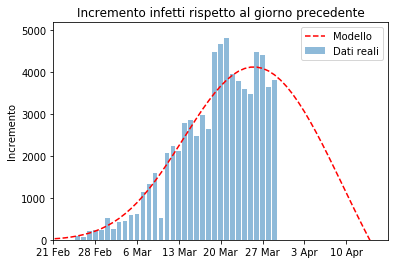

In [19]:
incr_infetti=[]
incr_reali=[]

for i in range(len(i_vec)-1):
    incr_infetti.append(i_vec[i+1]/3-i_vec[i]/3)
    
for i in range(len(ydata_inf)-1):
    incr_reali.append(ydata_inf[i+1]-ydata_inf[i])


plt.bar(xdata[1:]+17,incr_reali,label='Dati reali',alpha=0.5)
plt.plot(t[1:],incr_infetti,label='Modello',color='red',linestyle='--')
plt.xticks(np.arange(14,65,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr'])
plt.xlim(14,70)
plt.ylabel('Incremento')
plt.title('Incremento infetti rispetto al giorno precedente')
plt.ylim(0,)
plt.legend()
plt.savefig('output/incremento_sintomatici.png',dpi=300)
plt.show()

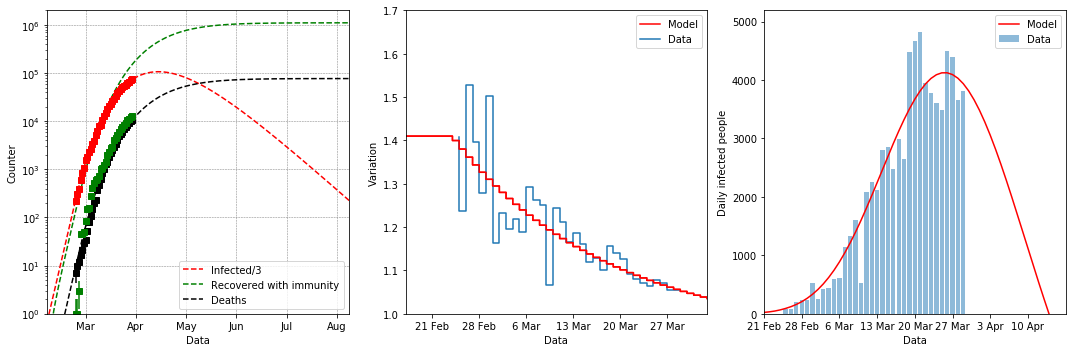

In [20]:
### combined plot

plt.figure(figsize=(15,5))
plt.subplot(1,3,3)
plt.bar(xdata[1:]+17,incr_reali,label='Data',alpha=0.5,color='#1f77b4')
plt.plot(t[1:],incr_infetti,label='Model',color='red')
plt.xticks(np.arange(14,65,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr'])
plt.xlim(14,70)
plt.xlabel('Data')
plt.ylabel('Daily infected people')
#plt.title('Incremento infetti rispetto al giorno precedente')
plt.ylim(0,)
plt.legend()
plt.subplot(1,3,2)
plt.step(t[1:],incr_SIR,label='Model',color='red')
plt.step(xdata[xdata>=1]+17,incremento,label='Data',color='#1f77b4')
plt.step(t[1:],incr_SIR,color='red')
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar'])
plt.xlim(10,55)
plt.ylim(1,1.7)
plt.legend()
plt.subplot(1,3,1)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
#plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlim(0,180)
plt.ylim(1,2*10**6)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('output/combined_SIR_incremento_v3.png',dpi=300)
plt.show()

## optimizer

In [21]:
def minimizer_1var(beta1):
    
    fin_result=time_evo(60*10**6,0.415,beta1,1/14,6,t_tresh=17,I0=2,t=np.arange(0,720))

    t=fin_result[0]
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]

    #compute the error on infected 
    modello_check=i_vec[17:17+len(ydata)]/3
    data_check=ydata_inf
    
    pesi=np.exp(-np.arange(len(data_check))/7)
    pesi=pesi[::-1]
    
    #accuracy=round(np.mean(np.abs((data_check-modello_check))/data_check*pesi)*100,2)   # con pesi
    accuracy=round(np.mean(np.abs((data_check-modello_check))/data_check)*100,2)
    
    #compute the error on deaths
    modello_death_check=m_vec[17:17+len(ydata)]
    data_death_check=ydata_death
    accuracy_death=round(np.mean(np.abs((data_death_check-modello_death_check))/data_death_check)*100,2)

    return accuracy

minimizer_1var_vec=np.vectorize(minimizer_1var)

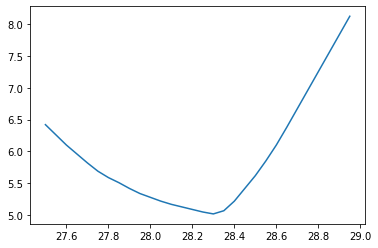

In [22]:
beta1grid=np.arange(27.5,29,0.05)
beta1y=minimizer_1var_vec(beta1grid)

plt.plot(beta1grid,beta1y)
plt.show()

## automatic minimization  (not working)

In [23]:
def minimizer(x):
    
    beta0,beta1,gamma,death_rate=x
    
    fin_result=time_evo(60*10**6,beta0,beta1,gamma,death_rate,t_tresh=17,I0=2,t=np.arange(0,720))

    t=fin_result[0]
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]

    #compute the error on infected 
    modello_check=i_vec[17:17+len(ydata)]/3
    data_check=(ydata-ydata_rec)
    accuracy=round(np.mean(np.abs((data_check-modello_check))/data_check)*100,2)
    
    #compute the error on deaths
    modello_death_check=m_vec[17:17+len(ydata)]
    data_death_check=ydata_death
    accuracy_death=round(np.mean(np.abs((data_death_check-modello_death_check))/data_death_check)*100,2)

    return (accuracy+accuracy_death)/2


minimizer_vec=np.vectorize(minimizer)

In [24]:
minimizer([0.415,28.5,1/14,4.8])

14.26

In [25]:
initial_guess=[0.415,27,1/14,5]

from scipy.optimize import minimize

res=minimize(minimizer,initial_guess)

res.x

array([ 0.415     , 27.        ,  0.07142857,  5.        ])

In [26]:
# brute force (not efficient)

b0_grid=np.linspace(0.41,0.42,10)
b1_grid=np.linspace(27,28,10)
gamma_grid=np.linspace(0.06,0.09,10)
death_rate_grid=np.linspace(4,6,10)

minimo_tab=[]

#for i in b0_grid:
#    print(i)
#    for j in b1_grid:
#        for k in gamma_grid:
#            for l in death_rate_grid:
#                minimo_tab.append([i,j,k,l,minimizer([i,j,k,l])])

In [27]:
#minimo_tab_arr=np.array(minimo_tab)

#position=minimo_tab_arr[:,4].argmin()
#minimo_tab_arr[position]

## predictions with uncertaintites

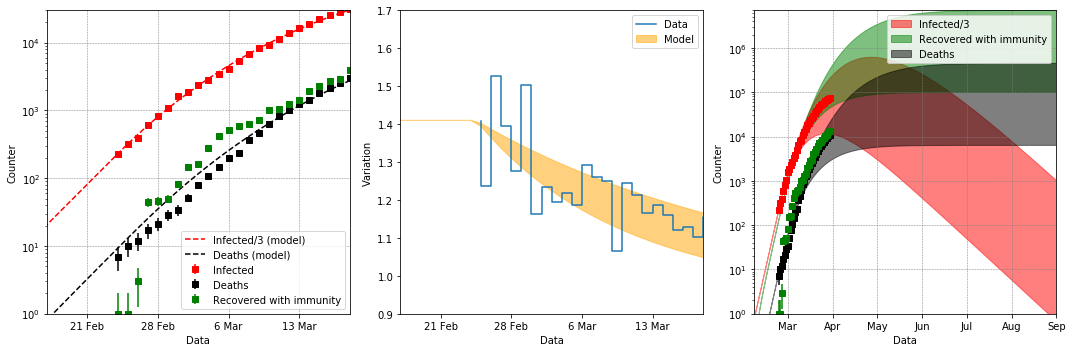

In [28]:
### combined plot

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.errorbar(xdata+17,ydata-ydata_rec,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s',label='Infected')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s',label='Deaths')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s',label='Recovered with immunity')
plt.plot(t, s_vec, 'b--')
plt.plot(t, i_vec/3, 'r--',label='Infected/3 (model)')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--',label='Deaths (model)')
plt.yscale('log')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(10,40)
plt.ylim(1,3*10**4)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.subplot(1,3,2)
plt.step(xdata[xdata>=1]+17,incremento,label='Data')
#plt.step(t[1:],incr_SIR,label='Model')
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,43,1/14,5))
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,13,1/14,5))
plt.fill_between(t[1:],incr_SIR_high,incr_SIR_low,color='orange',alpha=0.5,label='Model')
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(10,40)
plt.ylim(0.9,1.7)
plt.legend()
plt.subplot(1,3,3)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
#plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.fill_between(t, i_vec_high/3,i_vec_low/3, label='Infected/3',color='red',alpha=0.5)
plt.fill_between(t, r_vec_high,r_vec_low, color='green',alpha=0.5, label='Recovered with immunity')
plt.fill_between(t, m_vec_high,m_vec_low,color='black',alpha=0.5, label='Deaths')
plt.yscale('log')
plt.xlim(0,180)
plt.ylim(1,0.7*10**7)
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('combined_SIR_band_v3.png',dpi=300)
plt.show()

In [29]:
print('Total deaths ',int(m_vec_low[-1]),'-',int(m_vec_high[-1]))
print('Total infected ',int(m_vec_low[-1]+r_vec_low[-1]),'-',int(m_vec_high[-1]+r_vec_high[-1]))
print('Maximum infected (detected) ',int(i_vec_low.max()/3),'-',int(i_vec_high.max()/3))
print('Maximum infected (hospitalized)',int(i_vec_low.max()/3*20/100),'-',int(i_vec_high.max()/3*20/100))
print('Maximum infected (intensive care)',int(i_vec_low.max()/3*10/100),'-',int(i_vec_high.max()/3*10/100))

Total deaths  6301 - 447370
Total infected  105029 - 7456177
Maximum infected (detected)  11556 - 611596
Maximum infected (hospitalized) 2311 - 122319
Maximum infected (intensive care) 1155 - 61159
